## EDA

In [1]:
# import modules

import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_test

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year
0,0,Mercedes-Benz C 300,1234,Abuja,New,4-cylinder(I4),automatic,petrol,White,2017
1,1,Honda Accord,29938,Abuja,Foreign Used,4-cylinder(I4),automatic,petrol,White,2013
2,2,Mercedes-Benz S 550,87501,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Black,2012
3,3,Toyota Sienna,180894,Lagos,Locally used,6-cylinder(V6),automatic,petrol,Dark Grey,2001
4,4,Toyota Hiace,104814,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,White,2000
...,...,...,...,...,...,...,...,...,...,...
431,431,Mercedes-Benz GLK 350,78175,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Dark Blue,2014
432,432,Honda Crosstour,129223,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Red,2011
433,433,Mercedes-Benz ML 350,100943,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Black,2013
434,434,Lexus GX 470,81463,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Mint green,2003


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015 entries, 0 to 1014
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1015 non-null   int64 
 1   title         1015 non-null   object
 2   odometer      1015 non-null   int64 
 3   location      1015 non-null   object
 4   isimported    1015 non-null   object
 5   engine        1015 non-null   object
 6   transmission  1015 non-null   object
 7   fuel          1015 non-null   object
 8   paint         1015 non-null   object
 9   year          1015 non-null   int64 
 10  target        1015 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 87.4+ KB


#### Categorical variable 다루기

- title 에서 brand만 추출해서 category를 줄이는 작업이 필요함
- paint도 category 줄이는 작업 필요함

In [5]:
df_train.describe(include='object')

,title,location,isimported,engine,transmission,fuel,paint
count,1015,1015,1015,1015,1015,1015,1015
unique,203,13,3,8,2,2,76
top,Toyota Camry,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Black
freq,129,792,744,618,965,970,292


In [6]:
def clean_txt(txt):
    corpus = []

    for i in range(len(txt)):
        review = re.sub(r'[@%\\*=()/~#&\+á?\xc3\xa1\-\|\.\:\;\!\-\,\_\~\$\'\"\n\]\[\>\<]', '',txt[i]) #@%*=()/+ 와 같은 문장부호 제거
        review = re.sub(r'\d+','',review)#숫자 제거
        review = review.lower() #소문자 변환
        review = re.sub(r'\s+', ' ', review) #extra space 제거
        review = re.sub(r'<[^>]+>','',review) #Html tags 제거
        review = re.sub(r'\s+', ' ', review) #spaces 제거
        review = re.sub(r"^\s+", '', review) #space from start 제거
        review = re.sub(r'\s+$', '', review) #space from the end 제거
        review = re.sub(r'_', ' ', review) #space from the end 제거
        #review = re.sub(r'l', '', review)
        corpus.append(review)

    return corpus

In [7]:
temp = clean_txt(df_train['paint'])
df_train['paint'] = temp

temp = clean_txt(df_test['paint'])
df_test['paint'] = temp

In [8]:
df_train['paint'].value_counts()

black                     310
white                     144
silver                    109
grey                       87
blue                       78
red                        58
dark grey                  48
gold                       41
green                      20
gray                       18
dark blue                  17
brown                      16
wine                        9
sliver                      5
dark ash                    4
cream                       4
ash                         3
purple                      3
yellow                      3
whiteblue                   2
dark gray                   2
maroon                      2
sky blue                    2
milk                        2
deep blue                   2
navy blue                   1
pale brown                  1
ash and black               1
magnetic gray metallic      1
skye blue                   1
off white                   1
black sand pearl            1
light silver                1
black and 

In [9]:
df_test['paint'].value_counts()

black                  124
silver                  63
white                   61
red                     36
grey                    32
blue                    31
dark grey               14
gray                    13
green                   12
gold                    11
brown                    6
dark blue                5
yellow                   3
dark green               3
sliver                   3
cream                    2
light grey               2
wine                     2
ash                      2
navy blue                1
beige                    1
classic silver metf      1
grey and black           1
indigo ink pearl         1
white and green          1
golf                     1
dark ash                 1
blac                     1
maroon                   1
mint green               1
Name: paint, dtype: int64

In [10]:
df_train.replace('redl', 'red', inplace=True)
df_train.replace('off white l', 'white', inplace=True)
df_train['paint'].value_counts()

black                     310
white                     145
silver                    109
grey                       87
blue                       78
red                        59
dark grey                  48
gold                       41
green                      20
gray                       18
dark blue                  17
brown                      16
wine                        9
sliver                      5
dark ash                    4
cream                       4
purple                      3
ash                         3
yellow                      3
whiteblue                   2
maroon                      2
sky blue                    2
dark gray                   2
milk                        2
deep blue                   2
navy blue                   1
pale brown                  1
ash and black               1
magnetic gray metallic      1
off white                   1
black sand pearl            1
light silver                1
black and silver            1
whine     

In [11]:
def txt_split(df):
    df['brand'] = df['title'].apply(lambda x: x.split(' ')[0])
    return df

In [12]:
def etc_replace(df):
    bottom_brand = df['brand'].value_counts().loc[lambda x: x <= 5].index
    bottom_paint = df['paint'].value_counts().loc[lambda x: x <= 5].index

    df.replace(bottom_brand, 'etc', inplace=True)
    df.replace(bottom_paint, 'etc', inplace=True)

    return df

In [13]:
txt_split(df_train)
txt_split(df_test)

etc_replace(df_train)
etc_replace(df_test)

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,brand
0,0,Mercedes-Benz C 300,1234,Abuja,New,4-cylinder(I4),automatic,petrol,white,2017,Mercedes-Benz
1,1,Honda Accord,29938,Abuja,Foreign Used,4-cylinder(I4),automatic,petrol,white,2013,Honda
2,2,Mercedes-Benz S 550,87501,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,black,2012,Mercedes-Benz
3,3,Toyota Sienna,180894,Lagos,Locally used,6-cylinder(V6),automatic,petrol,dark grey,2001,Toyota
4,4,Toyota Hiace,104814,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,white,2000,Toyota
...,...,...,...,...,...,...,...,...,...,...,...
431,431,Mercedes-Benz GLK 350,78175,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,etc,2014,Mercedes-Benz
432,432,Honda Crosstour,129223,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,red,2011,Honda
433,433,Mercedes-Benz ML 350,100943,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,black,2013,Mercedes-Benz
434,434,Lexus GX 470,81463,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,etc,2003,Lexus


In [14]:
df_train.describe(include='object')

,title,location,isimported,engine,transmission,fuel,paint,brand
count,1015,1015,1015,1015,1015,1015,1015,1015
unique,203,13,3,8,2,2,14,16
top,Toyota Camry,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,black,Toyota
freq,129,792,744,618,965,970,310,474


In [15]:
df_test.describe(include='object')

,title,location,isimported,engine,transmission,fuel,paint,brand
count,436,436,436,436,436,436,436,436
unique,124,11,3,8,2,2,12,9
top,Toyota Corolla,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,black,Toyota
freq,52,338,321,278,414,416,124,225


In [16]:
def drop_cols(df):
    df.drop(columns=['title', 'id'], inplace=True)
    return df

In [17]:
drop_cols(df_train)
drop_cols(df_test)

,odometer,location,isimported,engine,transmission,fuel,paint,year,brand
0,1234,Abuja,New,4-cylinder(I4),automatic,petrol,white,2017,Mercedes-Benz
1,29938,Abuja,Foreign Used,4-cylinder(I4),automatic,petrol,white,2013,Honda
2,87501,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,black,2012,Mercedes-Benz
3,180894,Lagos,Locally used,6-cylinder(V6),automatic,petrol,dark grey,2001,Toyota
4,104814,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,white,2000,Toyota
...,...,...,...,...,...,...,...,...,...
431,78175,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,etc,2014,Mercedes-Benz
432,129223,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,red,2011,Honda
433,100943,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,black,2013,Mercedes-Benz
434,81463,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,etc,2003,Lexus


In [18]:
#라벨인코딩을 하기 위함 dictionary map 생성 함수
def make_label_map(dataframe):
    label_maps = {}
    for col in dataframe.columns:
        if dataframe[col].dtype=='object':
            label_map = {'unknown':0}
            for i, key in enumerate(dataframe[col].unique()):
                label_map[key] = i+1  #새로 등장하는 유니크 값들에 대해 1부터 1씩 증가시켜 키값을 부여해줍니다.
            label_maps[col] = label_map
    print(label_maps)
    return label_maps

# 각 범주형 변수에 인코딩 값을 부여하는 함수
def label_encoder(dataframe, label_map):
    for col in dataframe.columns:
        if dataframe[col].dtype=='object':
            dataframe[col] = dataframe[col].map(label_map[col])
            dataframe[col] = dataframe[col].fillna(label_map[col]['unknown']) #혹시 모를 결측값은 unknown의 값(0)으로 채워줍니다.
    return dataframe

le = make_label_map(df_train)
df_train_encoded = label_encoder(df_train, le)

le = make_label_map(df_test)
df_test_encoded = label_encoder(df_test, le)

{'location': {'unknown': 0, 'Lagos ': 1, 'Lagos': 2, 'Abuja': 3, 'Lagos State': 4, 'Ogun': 5, 'FCT': 6, 'Accra': 7, 'other': 8, 'Abuja ': 9, 'Abia State': 10, 'Adamawa ': 11, 'Abia': 12, 'Ogun State': 13}, 'isimported': {'unknown': 0, 'Foreign Used': 1, 'New ': 2, 'Locally used': 3}, 'engine': {'unknown': 0, '4-cylinder(I4)': 1, '6-cylinder(V6)': 2, '8-cylinder(V8)': 3, '6-cylinder(I6)': 4, '4-cylinder(H4)': 5, '5-cylinder(I5)': 6, '3-cylinder(I3)': 7, '2-cylinder(I2)': 8}, 'transmission': {'unknown': 0, 'automatic': 1, 'manual': 2}, 'fuel': {'unknown': 0, 'petrol': 1, 'diesel': 2}, 'paint': {'unknown': 0, 'red': 1, 'black': 2, 'gray': 3, 'white': 4, 'blue': 5, 'silver': 6, 'etc': 7, 'dark grey': 8, 'brown': 9, 'grey': 10, 'green': 11, 'gold': 12, 'dark blue': 13, 'wine': 14}, 'brand': {'unknown': 0, 'Toyota': 1, 'Land': 2, 'Lexus': 3, 'etc': 4, 'Ford': 5, 'Honda': 6, 'Volvo': 7, 'BMW': 8, 'Mercedes-Benz': 9, 'Hyundai': 10, 'Nissan': 11, 'Mack': 12, 'Mazda': 13, 'Kia': 14, 'Volkswagen'

In [19]:
df_train_encoded

,odometer,location,isimported,engine,transmission,fuel,paint,year,target,brand
0,18277,1,1,1,1,1,1,2016,13665000,1
1,10,2,2,1,1,1,2,2019,33015000,1
2,83091,2,1,2,1,1,1,2012,9915000,2
3,91524,2,1,1,1,1,3,2007,3815000,3
4,94177,2,1,2,1,1,1,2010,7385000,1
...,...,...,...,...,...,...,...,...,...,...
1010,46768,2,1,1,1,1,2,2014,5415000,1
1011,31600,3,1,1,1,1,6,2011,3615000,1
1012,96802,3,1,1,1,1,2,2011,3415000,1
1013,146275,2,1,2,1,1,12,2013,14315000,3


In [20]:
df_test_encoded

,odometer,location,isimported,engine,transmission,fuel,paint,year,brand
0,1234,1,1,1,1,1,1,2017,1
1,29938,1,2,1,1,1,1,2013,2
2,87501,2,2,1,1,1,2,2012,1
3,180894,2,3,2,1,1,3,2001,3
4,104814,2,2,1,1,1,1,2000,3
...,...,...,...,...,...,...,...,...,...
431,78175,2,2,2,1,1,11,2014,1
432,129223,2,2,2,1,1,4,2011,2
433,100943,2,2,1,1,1,2,2013,1
434,81463,2,2,1,1,1,11,2003,5


#### numerical variable 확인

In [21]:
# odometer == 0을 mean값으로 대체

df_train_encoded[df_train_encoded['odometer'] == 0]

,odometer,location,isimported,engine,transmission,fuel,paint,year,target,brand
52,0,2,3,1,2,2,11,2006,5535000,4
121,0,2,3,2,2,2,4,2004,8515000,4
134,0,2,3,1,2,2,4,2006,3015000,11
176,0,2,3,1,2,2,5,2003,2890000,4
260,0,3,1,4,1,1,4,2018,18515000,9
301,0,2,3,4,2,2,1,1999,5360000,4
351,0,2,3,4,2,2,4,1996,6915000,7
352,0,2,3,1,2,2,7,2014,16690000,1
372,0,2,1,1,1,1,5,2003,1715000,1
383,0,2,3,2,2,2,4,1995,8015000,12


In [22]:
odo_mean = int(df_train_encoded.odometer.mean())

df_train_encoded.replace({'odometer':0}, odo_mean, inplace=True)
df_train_encoded

,odometer,location,isimported,engine,transmission,fuel,paint,year,target,brand
0,18277,1,1,1,1,1,1,2016,13665000,1
1,10,2,2,1,1,1,2,2019,33015000,1
2,83091,2,1,2,1,1,1,2012,9915000,2
3,91524,2,1,1,1,1,3,2007,3815000,3
4,94177,2,1,2,1,1,1,2010,7385000,1
...,...,...,...,...,...,...,...,...,...,...
1010,46768,2,1,1,1,1,2,2014,5415000,1
1011,31600,3,1,1,1,1,6,2011,3615000,1
1012,96802,3,1,1,1,1,2,2011,3415000,1
1013,146275,2,1,2,1,1,12,2013,14315000,3


- year의 경우 1217과 같은 오탈자가 있기 때문에 1900 이상만 사용

In [23]:
df_train_encoded.year.value_counts()

2008    82
2013    73
2010    71
2016    70
2014    68
2007    68
2011    59
2009    57
2012    56
2006    56
2018    47
2015    45
2005    44
2004    36
2003    34
2017    29
2001    21
2019    17
2002    17
2020    17
2000    12
1999    10
1996     7
1998     5
1995     3
1994     3
1991     2
1985     1
1218     1
1982     1
1997     1
1217     1
1980     1
Name: year, dtype: int64

In [24]:
df_train_encoded = df_train_encoded[df_train_encoded['year'] > 1900]
df_train_encoded.shape

(1013, 10)

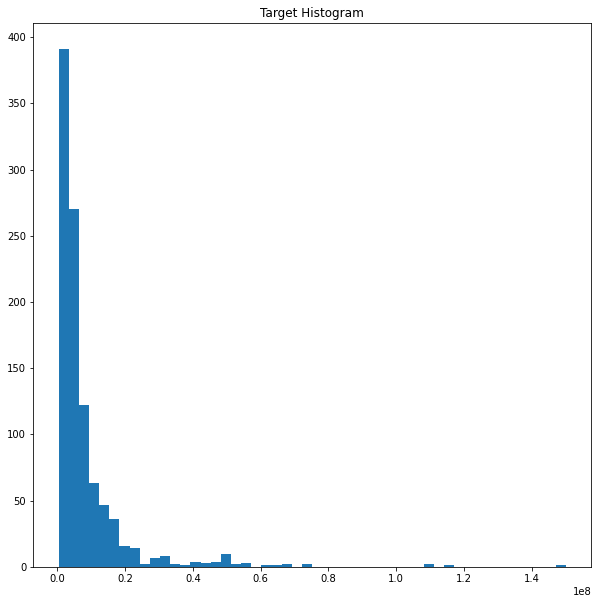

In [25]:
# target변수 확인

plt.figure(figsize=(10, 10))
plt.hist(df_train['target'], bins=50)
plt.title('Target Histogram')
plt.show()

- target variable이 오른쪽 긴꼬리분포를 띔
    - 따라서 normalization이 필요함

In [26]:
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()
scaler_robust = RobustScaler()

In [27]:
train_data, val_data = train_test_split(df_train_encoded, test_size=0.2)
train_data.reset_index(inplace=True)
val_data.reset_index(inplace=True)

In [28]:
x_train = train_data.drop(['index', 'target'], axis=1)
y_train = train_data.target

x_val = val_data.drop(['index', 'target'], axis=1)
y_val = val_data.target

In [29]:
params = {
    'n_estimators': (10, 50, 100, 200),
    'max_depth': (5, 8, 10, 15),
    'min_samples_leaf': (5, 8, 18, 20, 30),
    'min_samples_split': (5, 8, 16, 20, 30)
}

model = RandomForestRegressor(random_state=42, n_jobs=-1)
grid = GridSearchCV(model, param_grid=params, cv=2, n_jobs=-1)
grid.fit(x_train, y_train)

print(f'best parameters: {grid.best_params_}')
print(f'best score: {grid.best_score_:.2f}')

best parameters: {'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 8, 'n_estimators': 100}
best score: 0.41


In [30]:
model = RandomForestRegressor(
    random_state=42,
    n_jobs=-1,
    max_depth=8,
    min_samples_leaf=5,
    min_samples_split=5,
    n_estimators=50
)
model.fit(x_train, y_train)

RandomForestRegressor(max_depth=8, min_samples_leaf=5, min_samples_split=5,
                      n_estimators=50, n_jobs=-1, random_state=42)

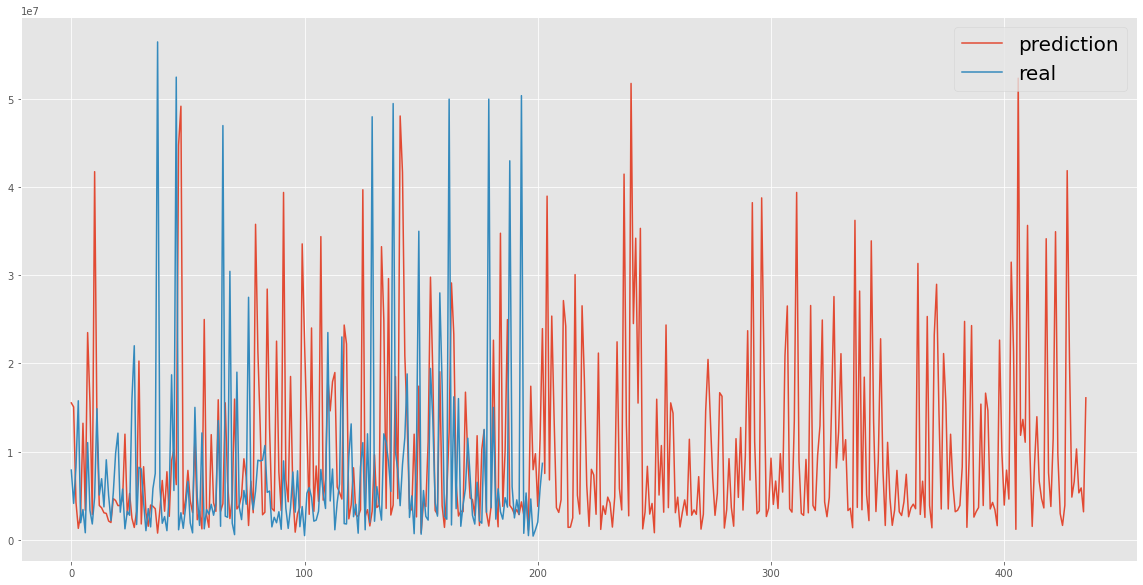

In [33]:
plt.style.use('ggplot')
plt.figure(figsize=(20, 10))
plt.plot(y_pred, label='prediction')
plt.plot(y_val, label='real')
plt.legend(fontsize=20)
plt.show()

In [34]:
y_pred = model.predict(df_test_encoded)
y_pred

array([15523533.96037622, 15064607.75524391,  4240221.32491182,
        1278023.04906885,  2878270.1575465 , 13214780.08363703,
        3340949.59728116, 23506457.52166903, 15605007.61877874,
        2861854.76277924, 41779870.22005772, 13088683.71653587,
        3879091.36538888,  3605717.75888794,  3046642.17406743,
        2977315.23639243,  2111279.32100703,  1941580.62902226,
        4651984.13280251,  4442468.92257101,  3865643.96419314,
        3871492.89676133,  4598464.84708823, 11973815.19679496,
        2838349.76277924,  5236771.24556288,  2416347.77250219,
        1380248.53446606,  3230790.90504542, 20277361.82559029,
        1775502.33222992,  8279168.65312792,  3043832.987248  ,
        1519375.22646446,  3927982.4667416 ,  3786699.36193017,
        3505534.51541462,   741746.86020296,  3449257.61931073,
        6717294.2953868 ,  3221861.96935193,  7709494.9130748 ,
        2645345.21044472,  8980812.76484953, 10240662.95609538,
        6241787.88991298, 44806357.92771

In [35]:
submission = pd.read_csv('sample_submission.csv')
submission['target'] = y_pred
submission

,id,target
0,0,1.552353e+07
1,1,1.506461e+07
2,2,4.240221e+06
3,3,1.278023e+06
4,4,2.878270e+06
...,...,...
431,431,1.029542e+07
432,432,5.306337e+06
433,433,5.868039e+06
434,434,3.159249e+06


In [254]:
submission.to_csv('submit_1.csv', index=False)

## ------------------------- NEW (pycaret 사용) ----------------------------

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
train = pd.read_csv('train.csv')
train.drop(['id'], axis=1, inplace=True)

test = pd.read_csv('test.csv')
test.drop(['id'], axis=1, inplace=True)

In [13]:
train

,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target
0,Toyota RAV 4,18277,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Red,2016,13665000
1,Toyota Land Cruiser,10,Lagos,New,4-cylinder(I4),automatic,petrol,Black,2019,33015000
2,Land Rover Range Rover Evoque,83091,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Red,2012,9915000
3,Lexus ES 350,91524,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Gray,2007,3815000
4,Toyota Venza,94177,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Red,2010,7385000
...,...,...,...,...,...,...,...,...,...,...
1010,Toyota Corolla,46768,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Black,2014,5415000
1011,Toyota Camry,31600,Abuja,Foreign Used,4-cylinder(I4),automatic,petrol,Silver,2011,3615000
1012,Toyota Camry,96802,Abuja,Foreign Used,4-cylinder(I4),automatic,petrol,Black,2011,3415000
1013,Lexus GX 460,146275,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Gold,2013,14315000


In [14]:
test

,title,odometer,location,isimported,engine,transmission,fuel,paint,year
0,Mercedes-Benz C 300,1234,Abuja,New,4-cylinder(I4),automatic,petrol,White,2017
1,Honda Accord,29938,Abuja,Foreign Used,4-cylinder(I4),automatic,petrol,White,2013
2,Mercedes-Benz S 550,87501,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Black,2012
3,Toyota Sienna,180894,Lagos,Locally used,6-cylinder(V6),automatic,petrol,Dark Grey,2001
4,Toyota Hiace,104814,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,White,2000
...,...,...,...,...,...,...,...,...,...
431,Mercedes-Benz GLK 350,78175,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Dark Blue,2014
432,Honda Crosstour,129223,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Red,2011
433,Mercedes-Benz ML 350,100943,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Black,2013
434,Lexus GX 470,81463,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Mint green,2003


In [15]:
print('------------------ train -----------------')
train.info()

print('\n\n------------------- test --------------------')
test.info()

------------------ train -----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015 entries, 0 to 1014
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         1015 non-null   object
 1   odometer      1015 non-null   int64 
 2   location      1015 non-null   object
 3   isimported    1015 non-null   object
 4   engine        1015 non-null   object
 5   transmission  1015 non-null   object
 6   fuel          1015 non-null   object
 7   paint         1015 non-null   object
 8   year          1015 non-null   int64 
 9   target        1015 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 79.4+ KB


------------------- test --------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         436 non-null    object
 1   odometer    

### brand

In [16]:
# extract brand from 'title'

train['brand'] = train['title'].apply(lambda x:x.split()[0])
test['brand'] = test['title'].apply(lambda x:x.split()[0])

In [17]:
train.head()

,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target,brand
0,Toyota RAV 4,18277,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Red,2016,13665000,Toyota
1,Toyota Land Cruiser,10,Lagos,New,4-cylinder(I4),automatic,petrol,Black,2019,33015000,Toyota
2,Land Rover Range Rover Evoque,83091,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Red,2012,9915000,Land
3,Lexus ES 350,91524,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Gray,2007,3815000,Lexus
4,Toyota Venza,94177,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Red,2010,7385000,Toyota


In [18]:
train = train.replace({'Mercedes-Benz/52':'Mercedes-Benz'})

In [19]:
# mean target value of each brands

brand_list = train[['target', 'brand']].groupby(['brand'], as_index=False).mean().sort_values(by='target', ascending=True, ignore_index=True)
brand_list

,brand,target
0,Audi,1.215000e+06
1,GAC,1.490000e+06
2,Nissan,1.926125e+06
3,Mazda,2.078750e+06
4,Peugeot,2.125000e+06
5,Volkswagen,2.266538e+06
6,Jeep,2.515000e+06
7,Jaguar,2.665000e+06
8,Kia,2.697667e+06
9,Pontiac,2.715000e+06


In [23]:
# brand name -> numeric value

for i, br in enumerate(brand_list.brand):
    train = train.replace({
        br: i*10
    })

    test = test.replace({
        br: i*10,
        'Fiat': 0
    })

In [25]:
train[['brand', 'target']].groupby(['brand']).mean()

,target
brand,
0,1.215000e+06
10,1.490000e+06
20,1.926125e+06
30,2.078750e+06
40,2.125000e+06
50,2.266538e+06
60,2.515000e+06
70,2.665000e+06
80,2.697667e+06


### location

In [26]:
print('--------------------- train ---------------------')
print(sorted(train.location.unique()))

print('\n\n---------------------- test -----------------------')
print(sorted(test.location.unique()))

--------------------- train ---------------------
['Abia', 'Abia State', 'Abuja', 'Abuja ', 'Accra', 'Adamawa ', 'FCT', 'Lagos', 'Lagos ', 'Lagos State', 'Ogun', 'Ogun State', 'other']


---------------------- test -----------------------
['Abia', 'Abuja', 'Abuja ', 'Arepo ogun state ', 'Lagos', 'Lagos ', 'Lagos State', 'Mushin', 'Ogun', 'Ogun State', 'other']


In [29]:
train = train.replace({
    'Abia State': 'Abia',
    'Abuja ': 'Abuja',
    'Lagos ': 'Lagos',
    'Lagos State': 'Lagos',
    'Ogun State': 'Ogun'
})

test = test.replace({
    'Abuja ': 'Abuja',
    'Arepo ogun state ': 'Ogun',
    'Lagos ': 'Lagos',
    'Lagos State': 'Lagos',
    'Mushin': 'Lagos',
    'Ogun State': 'Ogun'
})

In [30]:
print('--------------------- train ---------------------')
print(sorted(train.location.unique()))

print('\n\n---------------------- test -----------------------')
print(sorted(test.location.unique()))

--------------------- train ---------------------
['Abia', 'Abuja', 'Accra', 'Adamawa ', 'FCT', 'Lagos', 'Ogun', 'other']


---------------------- test -----------------------
['Abia', 'Abuja', 'Lagos', 'Ogun', 'other']


### engine

In [31]:
print('--------------------- train ---------------------')
print(sorted(train.engine.unique()))

print('\n\n---------------------- test -----------------------')
print(sorted(test.engine.unique()))

--------------------- train ---------------------
['2-cylinder(I2)', '3-cylinder(I3)', '4-cylinder(H4)', '4-cylinder(I4)', '5-cylinder(I5)', '6-cylinder(I6)', '6-cylinder(V6)', '8-cylinder(V8)']


---------------------- test -----------------------
['12-cylinder(V12)', '2-cylinder(I2)', '3-cylinder(I3)', '4-cylinder(I4)', '5-cylinder(I5)', '6-cylinder(I6)', '6-cylinder(V6)', '8-cylinder(V8)']


In [32]:
train[['engine', 'target']].groupby(['engine']).mean()

,target
engine,
2-cylinder(I2),3.015000e+06
3-cylinder(I3),3.138333e+06
4-cylinder(H4),1.139000e+07
4-cylinder(I4),7.294036e+06
5-cylinder(I5),3.815000e+06
6-cylinder(I6),7.841907e+06
6-cylinder(V6),7.989856e+06
8-cylinder(V8),2.280010e+07


In [33]:
train = train.replace({
    '2-cylinder(I2)': 10,
    '3-cylinder(I3)': 20,
    '4-cylinder(I4)': 30,
    '5-cylinder(I5)': 40,
    '6-cylinder(I6)': 50,
    '6-cylinder(V6)': 60,
    '4-cylinder(H4)': 70,
    '8-cylinder(V8)': 80
})

test = test.replace({
    '2-cylinder(I2)': 10,
    '3-cylinder(I3)': 20,
    '4-cylinder(I4)': 30,
    '5-cylinder(I5)': 40,
    '6-cylinder(I6)': 50,
    '6-cylinder(V6)': 60,
    '4-cylinder(H4)': 70,
    '8-cylinder(V8)': 80,
    '12-cylinder(V12)': 90
})

In [34]:
train.head()

,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target,brand
0,Toyota RAV 4,18277,Lagos,Foreign Used,30,automatic,petrol,Red,2016,13665000,240
1,Toyota Land Cruiser,10,Lagos,New,30,automatic,petrol,Black,2019,33015000,240
2,Land Rover Range Rover Evoque,83091,Lagos,Foreign Used,60,automatic,petrol,Red,2012,9915000,390
3,Lexus ES 350,91524,Lagos,Foreign Used,30,automatic,petrol,Gray,2007,3815000,330
4,Toyota Venza,94177,Lagos,Foreign Used,60,automatic,petrol,Red,2010,7385000,240


### other

In [35]:
import re 

def clean_text(texts): 
    corpus = [] 
    for i in range(0, len(texts)): 
        review = re.sub(r'[@%\\*=()/~#&\+á?\xc3\xa1\-\|\.\:\;\!\-\,\_\~\$\'\"\n\]\[\>\<]', '',texts[i]) #@%*=()/+ 와 같은 문장부호 제거
        review = re.sub(r'\d+','',review)#숫자 제거
        review = review.lower() #소문자 변환
        review = re.sub(r'\s+', ' ', review) #extra space 제거
        review = re.sub(r'<[^>]+>','',review) #Html tags 제거
        review = re.sub(r'\s+', ' ', review) #spaces 제거
        review = re.sub(r"^\s+", '', review) #space from start 제거
        review = re.sub(r'\s+$', '', review) #space from the end 제거
        review = re.sub(r'_', ' ', review) #space from the end 제거
        #review = re.sub(r'l', '', review)
        corpus.append(review) 
        
    return corpus

temp = clean_text(train['paint']) #메소드 적용
train['paint'] = temp
print('train data에서 paint의 unique 카테고리 개수 : ', len(train['paint'].unique()))

train data에서 paint의 unique 카테고리 개수 :  51


In [36]:
temp2 = clean_text(test['paint'])
test['paint'] = temp2
print('test data에서 paint의 unique 카테고리 개수 : ', len(test['paint'].unique()))

test data에서 paint의 unique 카테고리 개수 :  30


In [37]:
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'blue' if x.find('blue') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'red' if x.find('red') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'green' if x.find('green') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'grey' if x.find('grey') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'grey' if x.find('gery') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'grey' if x.find('gray') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'ash' if x.find('ash') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'brown' if x.find('brown') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'silver' if x.find('silver') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'silver' if x.find('sliver') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'black' if x.find('black') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'gold' if x.find('gold') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'wine' if x.find('whine') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'white' if x.find('white') >= 0 else x)


test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'blue' if x.find('blue') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'red' if x.find('red') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'green' if x.find('green') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'grey' if x.find('grey') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'grey' if x.find('gery') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'grey' if x.find('gray') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'ash' if x.find('ash') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'brown' if x.find('brown') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'silver' if x.find('silver') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'silver' if x.find('sliver') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'black' if x.find('black') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'black' if x.find('blac') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'gold' if x.find('gold') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'wine' if x.find('whine') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'white' if x.find('white') >= 0 else x)

In [38]:
print('train data에서 paint의 unique 카테고리 개수 : ', len(train['paint'].value_counts()))

train data에서 paint의 unique 카테고리 개수 :  18


In [39]:
print('test data에서 paint의 unique 카테고리 개수 : ', len(test['paint'].value_counts()))

test data에서 paint의 unique 카테고리 개수 :  17


In [40]:
sorted(train.paint.unique())

['ash',
 'beige',
 'black',
 'blue',
 'brown',
 'cream',
 'gold',
 'green',
 'grey',
 'maroon',
 'milk',
 'orange',
 'purple',
 'red',
 'silver',
 'white',
 'wine',
 'yellow']

In [41]:
sorted(test.paint.unique())

['ash',
 'beige',
 'black',
 'blue',
 'brown',
 'cream',
 'gold',
 'golf',
 'green',
 'grey',
 'indigo ink pearl',
 'maroon',
 'red',
 'silver',
 'white',
 'wine',
 'yellow']

In [42]:
train = train.replace({
    'milk' : 'cream',
    'maroon' : 'red',
    'wine' : 'red',
})

test = test.replace({
    'indigo ink pearl' : 'blue',
    'golf' : 'green',
    'maroon' : 'red',
    'wine' : 'red',
})

In [43]:
print('train data에서 paint의 unique 카테고리 개수 : ', len(train['paint'].value_counts()))
print('test data에서 paint의 unique 카테고리 개수 : ', len(test['paint'].value_counts()))

train data에서 paint의 unique 카테고리 개수 :  15
test data에서 paint의 unique 카테고리 개수 :  13


In [44]:
train['colorType'] = train['paint'].apply(lambda x:'chromatic' if x=='red' or x=='blue' or x=='brown' or x=='gold' or x=='green' or x=='orange' or x=='purple' or x=='yellow' else 'achromatic') #유채색 chromatic
test['colorType'] = test['paint'].apply(lambda x:'chromatic' if x=='red' or x=='blue' or x=='brown' or x=='gold' or x=='green' or x=='orange' or x=='purple' or x=='yellow' else 'achromatic') #유채색 chromatic

In [45]:
train

,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target,brand,colorType
0,Toyota RAV 4,18277,Lagos,Foreign Used,30,automatic,petrol,red,2016,13665000,240,chromatic
1,Toyota Land Cruiser,10,Lagos,New,30,automatic,petrol,black,2019,33015000,240,achromatic
2,Land Rover Range Rover Evoque,83091,Lagos,Foreign Used,60,automatic,petrol,red,2012,9915000,390,chromatic
3,Lexus ES 350,91524,Lagos,Foreign Used,30,automatic,petrol,grey,2007,3815000,330,achromatic
4,Toyota Venza,94177,Lagos,Foreign Used,60,automatic,petrol,red,2010,7385000,240,chromatic
...,...,...,...,...,...,...,...,...,...,...,...,...
1010,Toyota Corolla,46768,Lagos,Foreign Used,30,automatic,petrol,black,2014,5415000,240,achromatic
1011,Toyota Camry,31600,Abuja,Foreign Used,30,automatic,petrol,silver,2011,3615000,240,achromatic
1012,Toyota Camry,96802,Abuja,Foreign Used,30,automatic,petrol,black,2011,3415000,240,achromatic
1013,Lexus GX 460,146275,Lagos,Foreign Used,60,automatic,petrol,gold,2013,14315000,330,chromatic


### year

In [46]:
train[(train.year == 1217) | (train.year == 1218)]

,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target,brand,colorType
415,Mercedes-Benz ATEGO,403461,Lagos,Locally used,30,manual,diesel,white,1218,6015000,320,achromatic
827,320,510053,Lagos,Locally used,60,manual,diesel,white,1217,75015000,320,achromatic


In [47]:
train['year'] = train['year'].apply(lambda x:0 if x<1900 or x>2022 else x)
test['year'] = test['year'].apply(lambda x:0 if x<1900 or x>2022 else x)

In [48]:
train[(train.year == 0)]

,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target,brand,colorType
415,Mercedes-Benz ATEGO,403461,Lagos,Locally used,30,manual,diesel,white,0,6015000,320,achromatic
827,320,510053,Lagos,Locally used,60,manual,diesel,white,0,75015000,320,achromatic


### price

In [49]:
train[(train.target > 100000000)]

,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target,brand,colorType
341,Land Rover Range Rover Sport,18720,Lagos,Foreign Used,80,automatic,petrol,grey,2019,117015000,390,achromatic
569,Lexus LX 570,55530,Abuja,Foreign Used,80,automatic,petrol,black,2014,110015000,330,achromatic
597,Rolls-Royce Ghost,16069,Lagos,Locally used,30,automatic,petrol,black,2011,150015008,400,achromatic
736,Mercedes-Benz G 63 AMG,20,Lagos,New,80,automatic,petrol,black,2019,108690000,320,achromatic


In [50]:
train.loc[341,'target'] = 33015000
train.loc[569,'target'] = 29015000
train.loc[736,'target'] = 60015000

In [51]:
train['target'] = train['target'].apply(lambda x:np.log(x))

In [52]:
train.head()

,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target,brand,colorType
0,Toyota RAV 4,18277,Lagos,Foreign Used,30,automatic,petrol,red,2016,16.430348,240,chromatic
1,Toyota Land Cruiser,10,Lagos,New,30,automatic,petrol,black,2019,17.312473,240,achromatic
2,Land Rover Range Rover Evoque,83091,Lagos,Foreign Used,60,automatic,petrol,red,2012,16.109559,390,chromatic
3,Lexus ES 350,91524,Lagos,Foreign Used,30,automatic,petrol,grey,2007,15.154451,330,achromatic
4,Toyota Venza,94177,Lagos,Foreign Used,60,automatic,petrol,red,2010,15.814961,240,chromatic


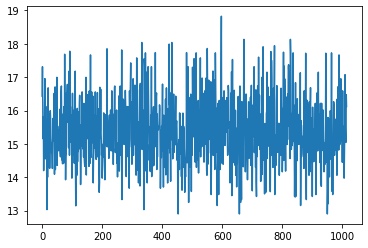

In [53]:
plt.plot(train.target)

In [54]:
from sklearn.preprocessing import MinMaxScaler

# 수치형 데이터 상관관계 히트맵 시각화
train_corr = train[['brand','engine','odometer', 'year', 'target']]
scaler= MinMaxScaler() 
train_corr[train_corr.columns] = scaler.fit_transform(train_corr[train_corr.columns])

c:\Users\hoon9\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\Users\hoon9\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [55]:
train_corr

,brand,engine,odometer,year,target
0,0.600,0.285714,0.018512,0.998020,0.595767
1,0.600,0.285714,0.000010,0.999505,0.744598
2,0.975,0.714286,0.084158,0.996040,0.541644
3,0.825,0.285714,0.092699,0.993564,0.380500
4,0.600,0.714286,0.095386,0.995050,0.491940
...,...,...,...,...,...
1010,0.600,0.285714,0.047369,0.997030,0.439590
1011,0.600,0.285714,0.032006,0.995545,0.371414
1012,0.600,0.285714,0.098045,0.995545,0.361812
1013,0.825,0.714286,0.148153,0.996535,0.603608


In [56]:
corr28 = train_corr.corr(method= 'pearson')

Text(0.5, 1.0, 'Correlation between features')

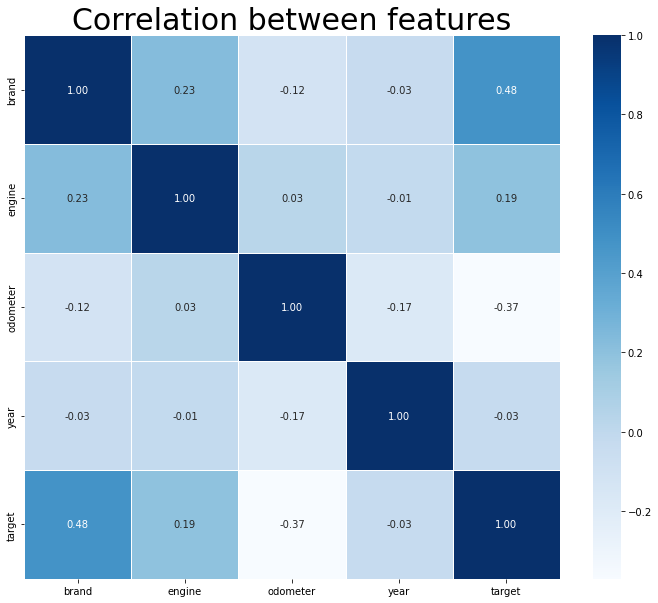

In [57]:
plt.figure(figsize=(12,10))
sns.heatmap(data = corr28, annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')
plt.title('Correlation between features', fontsize=30)

### auto ML (pycaret)

In [58]:
from pycaret.regression import *

reg_test_1 = setup(data=train,
                   target='target',
                   train_size=0.85,
                   use_gpu=True,
                   normalize=True,
                   normalize_method='minmax',
                   remove_perfect_collinearity=False,
                   numeric_features=['engine', 'brand'],
                   fold=10,
                   session_id=42)

,Description,Value
0,session_id,42
1,Target,target
2,Original Data,"(1015, 12)"
3,Missing Values,False
4,Numeric Features,4
5,Categorical Features,7
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(862, 225)"


In [59]:
best = compare_models(sort='mae', n_select=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.2249,0.1136,0.3317,0.8729,0.0202,0.0146,0.8760
rf,Random Forest Regressor,0.2418,0.1220,0.3440,0.8637,0.0208,0.0157,0.8290
gbr,Gradient Boosting Regressor,0.2450,0.1210,0.3416,0.8653,0.0207,0.0159,0.2310
lightgbm,Light Gradient Boosting Machine,0.2683,0.1396,0.3671,0.8444,0.0223,0.0174,1.4670
dt,Decision Tree Regressor,0.3017,0.1952,0.4362,0.7803,0.0264,0.0195,0.0170
ada,AdaBoost Regressor,0.3606,0.2117,0.4574,0.7594,0.0278,0.0235,0.1840
ridge,Ridge Regression,0.4419,0.3200,0.5629,0.6356,0.0341,0.0286,0.0120
br,Bayesian Ridge,0.4420,0.3203,0.5632,0.6354,0.0342,0.0286,0.0600
huber,Huber Regressor,0.4474,0.3820,0.6086,0.5712,0.0374,0.0290,0.1790
omp,Orthogonal Matching Pursuit,0.4678,0.3594,0.5971,0.5898,0.0362,0.0303,0.0110


In [60]:
best

[ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.0,
                     min_impurity_split=None, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=42, verbose=0, warm_start=False),
 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=42, verbose=0, warm_start=False),
 GradientBo

In [61]:
top5 = [rank for rank in best]
top5_tune = [tune_model(i) for i in top5]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3233,0.1726,0.4154,0.8556,0.0246,0.0206
1,0.3473,0.2839,0.5328,0.7363,0.0312,0.0219
2,0.3290,0.1918,0.4380,0.7354,0.0262,0.0211
3,0.2549,0.1387,0.3724,0.8094,0.0224,0.0165
4,0.2677,0.1426,0.3776,0.8019,0.0233,0.0175
5,0.2765,0.1264,0.3555,0.8804,0.0223,0.0183
6,0.3329,0.2180,0.4669,0.7637,0.0278,0.0214
7,0.2918,0.1447,0.3803,0.7913,0.0235,0.0193
8,0.3512,0.2231,0.4723,0.7764,0.0283,0.0226


In [65]:
blend = blend_models(estimator_list=best,
                     fold=5,
                     optimize='mae')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2827,0.1925,0.4387,0.8303,0.0258,0.0179
1,0.2178,0.1071,0.3272,0.8560,0.0197,0.0141
2,0.3154,0.1878,0.4333,0.7887,0.0272,0.0209
3,0.2267,0.0995,0.3155,0.8788,0.0190,0.0147
4,0.2631,0.1248,0.3533,0.8707,0.0217,0.0172
Mean,0.2612,0.1423,0.3736,0.8449,0.0227,0.0170
Std,0.0360,0.0399,0.0524,0.0326,0.0033,0.0024


In [68]:
blend = blend_models(estimator_list=best,
                     fold=10,
                     optimize='mae')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2385,0.0962,0.3101,0.9195,0.0185,0.0154
1,0.3611,0.2647,0.5145,0.7541,0.0306,0.0231
2,0.2175,0.0940,0.3066,0.8704,0.0185,0.0140
3,0.1959,0.1051,0.3243,0.8555,0.0195,0.0127
4,0.2050,0.0854,0.2923,0.8814,0.0178,0.0133
5,0.2110,0.0775,0.2784,0.9267,0.0177,0.0141
6,0.2377,0.1253,0.3540,0.8642,0.0211,0.0153
7,0.1851,0.0569,0.2385,0.9180,0.0147,0.0122
8,0.2707,0.1317,0.3629,0.8680,0.0219,0.0174


In [69]:
final_model = finalize_model(blend)

In [73]:
y_test = predict_model(final_model, data=test)
y_test = np.exp(y_test['Label'])

In [74]:
y_test

0      1.779379e+07
1      4.622415e+06
2      7.596920e+06
3      1.116691e+06
4      2.520056e+06
           ...     
431    1.139059e+07
432    4.551581e+06
433    1.005169e+07
434    2.935433e+06
435    2.943593e+06
Name: Label, Length: 436, dtype: float64

In [76]:
np.exp(train.target)

0       13665000.0
1       33015000.0
2        9915000.0
3        3815000.0
4        7385000.0
           ...    
1010     5415000.0
1011     3615000.0
1012     3415000.0
1013    14315000.0
1014    10015000.0
Name: target, Length: 1015, dtype: float64

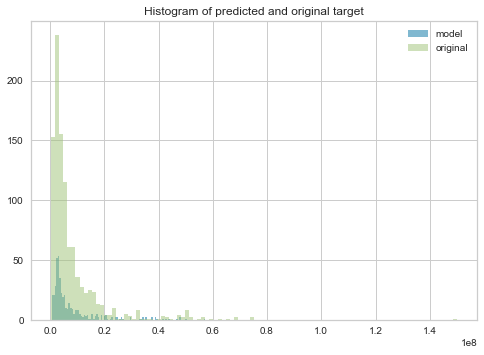

In [77]:
# histogram of scaled target
label_fix = np.exp(train.target) #*M_label
plt.hist(y_test, bins=100, label='model', alpha=0.5)
plt.hist(label_fix, bins=100, label='original', alpha=0.5)

plt.title('Histogram of predicted and original target')
plt.legend()
plt.show()